In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv('train.txt', sep = ';',header = None,names = ['text','emotion'])
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


<Axes: xlabel='emotion'>

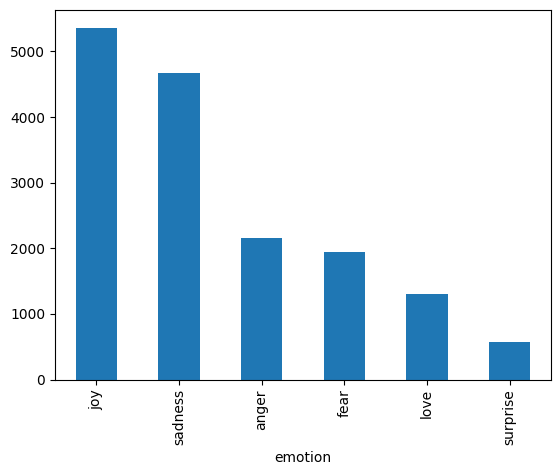

In [45]:
df['emotion'].value_counts().plot(kind = 'bar')

In [46]:
df['emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [47]:
dici = {'sadness':0,'anger':1,'love':2,'surprise':3,'fear':4,'joy':5}
df['emotion'] = df['emotion'].map(dici)
df.head()


,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


In [48]:
df['text'] = df['text'].apply(lambda x : x.lower())
df.head()


,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


In [49]:

import string

def remove_punc(txt):
  return txt.translate(str.maketrans('','',string.punctuation))

In [50]:
df['text'] = df['text'].apply(remove_punc)
df.head()

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1


In [51]:
def remove_numbers(txt):
    new = ""
    for i in txt:
        if not i.isdigit():
            new = new + i
    return new

df['text'] = df['text'].apply(remove_numbers)

In [52]:
def remove_numbers(txt):
    new = ""
    for i in txt:
        if not i.isdigit():
            new = new + i
    return new

df['text'] = df['text'].apply(remove_numbers)

In [53]:
import nltk

In [54]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [55]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
stop_words = set(stopwords.words('english'))


In [57]:
df.loc[1]['text']

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [58]:
def remove(txt):
  words = txt.split()
  cleaned = []
  for i in words:
    if not i in stop_words:
      cleaned.append(i)

  return ' '.join(cleaned)

In [59]:
df['text'] = df['text'].apply(remove)

In [60]:
df.loc[1]['text']

'go feeling hopeless damned hopeful around someone cares awake'

In [61]:
df.head()

,text,emotion
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,1
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,1


In [75]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidf = TfidfVectorizer()
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)


count = CountVectorizer()
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)

Naive bayes

In [77]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

NB_model_tfidf = MultinomialNB()
NB_model_tfidf.fit(X_train_tf, y_train)

y_pred_tfidf = NB_model_tfidf.predict(X_test_tf)

print("TF-IDF Model")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))


TF-IDF Model
Accuracy: 0.6609375
Confusion Matrix:
 [[ 883    0    0    0    2   61]
 [ 145  123    0    0    2  157]
 [  48    1    9    0    1  237]
 [  41    0    0    1    3   68]
 [ 137    8    0    0   88  164]
 [  10    0    0    0    0 1011]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.80       946
           1       0.93      0.29      0.44       427
           2       1.00      0.03      0.06       296
           3       1.00      0.01      0.02       113
           4       0.92      0.22      0.36       397
           5       0.60      0.99      0.74      1021

    accuracy                           0.66      3200
   macro avg       0.86      0.41      0.40      3200
weighted avg       0.76      0.66      0.58      3200



In [78]:
NB_model_count = MultinomialNB()
NB_model_count.fit(X_train_count, y_train)

y_pred_count = NB_model_count.predict(X_test_count)

print("Count Vectorizer Model")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_count))
print("Classification Report:\n", classification_report(y_test, y_pred_count))


Count Vectorizer Model
Accuracy: 0.768125
Confusion Matrix:
 [[899   8   3   0   4  32]
 [ 87 271   0   0  13  56]
 [ 51   6  79   0   4 156]
 [ 40   0   1   6  17  49]
 [ 87  15   0   0 226  69]
 [ 36   4   2   0   2 977]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       946
           1       0.89      0.63      0.74       427
           2       0.93      0.27      0.41       296
           3       1.00      0.05      0.10       113
           4       0.85      0.57      0.68       397
           5       0.73      0.96      0.83      1021

    accuracy                           0.77      3200
   macro avg       0.86      0.57      0.60      3200
weighted avg       0.80      0.77      0.74      3200



Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

LR_model_tfidf = LogisticRegression(max_iter=1000)
LR_model_tfidf.fit(X_train_tf, y_train)

y_pred_tfidf = LR_model_tfidf.predict(X_test_tf)

print("TF-IDF Model")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))


TF-IDF Model
Accuracy: 0.8628125
Confusion Matrix:
 [[893  13   1   0   7  32]
 [ 30 347   1   0  12  37]
 [ 12   5 182   0   4  93]
 [ 15   0   1  53  24  20]
 [ 24  17   1   7 302  46]
 [ 15   2  17   0   3 984]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       946
           1       0.90      0.81      0.86       427
           2       0.90      0.61      0.73       296
           3       0.88      0.47      0.61       113
           4       0.86      0.76      0.81       397
           5       0.81      0.96      0.88      1021

    accuracy                           0.86      3200
   macro avg       0.88      0.76      0.80      3200
weighted avg       0.87      0.86      0.86      3200



In [85]:
LR_model_count = LogisticRegression(max_iter=1000)
LR_model_count.fit(X_train_count, y_train)
y_pred_count = LR_model_count.predict(X_test_count)

print("Count Vectorizer Model")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_count))
print("Classification Report:\n", classification_report(y_test, y_pred_count))


Count Vectorizer Model
Accuracy: 0.8896875
Confusion Matrix:
 [[879  24   7   1  13  22]
 [ 24 366   0   2  15  20]
 [  5   2 225   1   4  59]
 [  5   0   1  82  19   6]
 [ 19  16   2   7 332  21]
 [ 16   5  31   2   4 963]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       946
           1       0.89      0.86      0.87       427
           2       0.85      0.76      0.80       296
           3       0.86      0.73      0.79       113
           4       0.86      0.84      0.85       397
           5       0.88      0.94      0.91      1021

    accuracy                           0.89      3200
   macro avg       0.88      0.84      0.86      3200
weighted avg       0.89      0.89      0.89      3200



SVM

In [84]:
from sklearn.svm import SVC
SVM_model_tfidf = SVC(max_iter=1000)
SVM_model_tfidf.fit(X_train_tf, y_train)

y_pred_tfidf = SVM_model_tfidf.predict(X_test_tf)

print("TF-IDF Model")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf))


TF-IDF Model
Accuracy: 0.8715625
Confusion Matrix:
 [[874  21   7   2  19  23]
 [ 24 367   2   0  13  21]
 [  8   4 196   0   2  86]
 [  8   0   1  59  25  20]
 [ 22  17   2   8 327  21]
 [ 26   3  17   1   8 966]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       946
           1       0.89      0.86      0.87       427
           2       0.87      0.66      0.75       296
           3       0.84      0.52      0.64       113
           4       0.83      0.82      0.83       397
           5       0.85      0.95      0.90      1021

    accuracy                           0.87      3200
   macro avg       0.87      0.79      0.82      3200
weighted avg       0.87      0.87      0.87      3200



In [83]:
SVM_model_count = SVC(max_iter=1000)
SVM_model_count.fit(X_train_count, y_train)

y_pred_count = SVM_model_count.predict(X_test_count)

print("Count Vectorizer Model")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_count))
print("Classification Report:\n", classification_report(y_test, y_pred_count))


Count Vectorizer Model
Accuracy: 0.8628125
Confusion Matrix:
 [[859  29   7   2  20  29]
 [ 25 366   1   0  13  22]
 [ 11   3 195   0   3  84]
 [ 13   1   1  54  25  19]
 [ 19  18   2   6 332  20]
 [ 31   5  19   2   9 955]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       946
           1       0.87      0.86      0.86       427
           2       0.87      0.66      0.75       296
           3       0.84      0.48      0.61       113
           4       0.83      0.84      0.83       397
           5       0.85      0.94      0.89      1021

    accuracy                           0.86      3200
   macro avg       0.86      0.78      0.81      3200
weighted avg       0.86      0.86      0.86      3200

